[[4.0, 3.7000000000000002, 4.0, 3.6000000000000001, 2.1000000000000001, 2.7999999999999998]]
[[4.0, 3.7000000000000002, 4.0, 3.6000000000000001, 2.1000000000000001, 2.7999999999999998], [3.7000000000000002, 4.0, 3.6000000000000001, 2.1000000000000001, 2.7999999999999998, 4.2000000000000002]]
[[4.0, 3.7000000000000002, 4.0, 3.6000000000000001, 2.1000000000000001, 2.7999999999999998], [3.7000000000000002, 4.0, 3.6000000000000001, 2.1000000000000001, 2.7999999999999998, 4.2000000000000002], [4.0, 3.6000000000000001, 2.1000000000000001, 2.7999999999999998, 4.2000000000000002, 3.7000000000000002]]
[[4.0, 3.7000000000000002, 4.0, 3.6000000000000001, 2.1000000000000001, 2.7999999999999998], [3.7000000000000002, 4.0, 3.6000000000000001, 2.1000000000000001, 2.7999999999999998, 4.2000000000000002], [4.0, 3.6000000000000001, 2.1000000000000001, 2.7999999999999998, 4.2000000000000002, 3.7000000000000002], [3.6000000000000001, 2.1000000000000001, 2.7999999999999998, 4.2000000000000002, 3.7000000000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


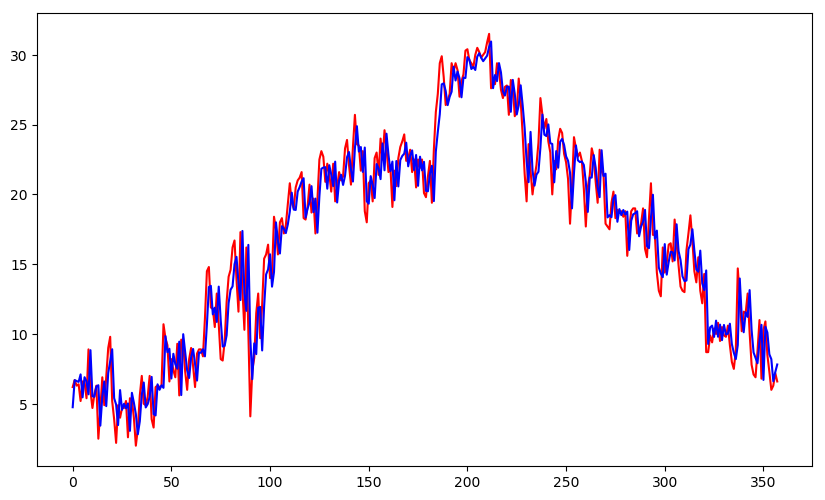

In [17]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 気温データ１０年分の読み込み
df = pd.read_csv('kion10y.csv',encoding = "utf-8")

# データを学習用とテスト用に分割
train_year = (df["年"] <= 2014)
test_year = (df["年"] >= 2015)
interval = 6

# 過去６日分を学習するデータ作成
def make_data(data):
    x = []  # 学習データ
    y = []  # 結果
    # 引数の気温カラムのデータを代入
    temps = list(data["気温"])
    # 気温のデータ数をlen()で取って、その分繰り返す
    for i in range(len(temps)):
        if i <= interval: continue
        y.append(temps[i])
        xa = []
        #　i（基準日）からinterval(6)引いてp(0-5)を足して、説明変数用のデータをxに格納
        for p in range(interval):
            d = i +p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x,y)

# df[]にboolのリストに当てはまるものを代入
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 　直線回帰分析を行う
lr = LinearRegression(normalize =True)
lr.fit(train_x,train_y) # 学習
pre_y = lr.predict(test_x) # 予測

# 結果を図にプロット
plt.figure(figsize = (10,6), dpi =100)
# 実際のレコードは赤色
plt.plot(test_y, c ='r')
# 予測のレコードは青色
plt.plot(pre_y, c ='b')
plt.savefig('tenki-kion-lr.png')
plt.show()